# Imports

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Get the Data

In [103]:
customers = pd.read_csv("Ecommerce Customers")

Examining the customers dataframe

In [104]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [105]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [106]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

Analyzing if there is a correlation between the **Time on Website** and the **Yearly Amount Spent**

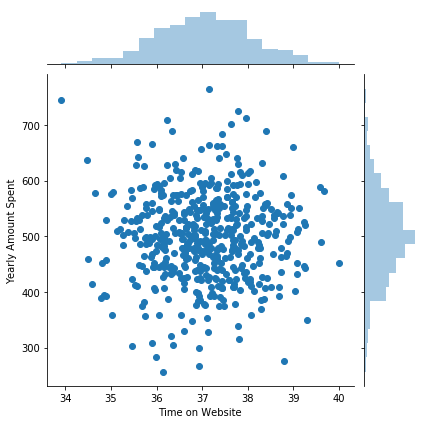

In [146]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = customers)

Conculsion: Cannot conclude there is any correlation between the **Time on Website** and the **Yearly Amount Spent**

Analyzing if there is a correlation between the **Time on App** and the **Yearly Amount Spent**

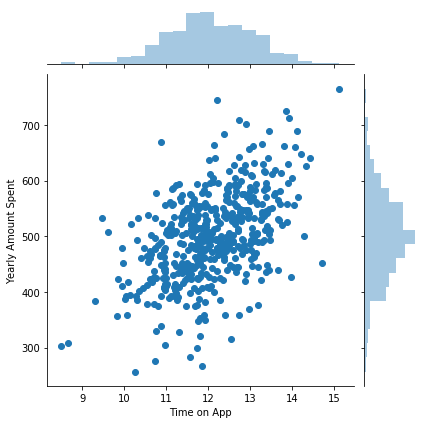

In [108]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers)

Conculsion: Can conclude there is any correlation between the **Time on App** and the **Yearly Amount Spent**

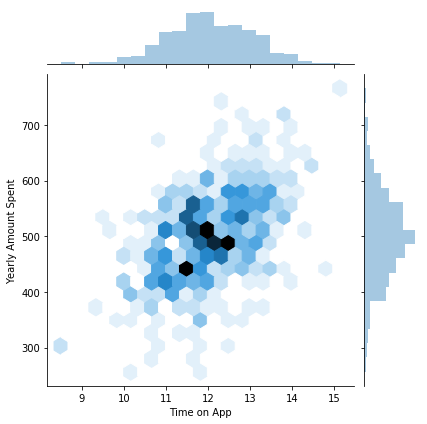

In [148]:
# Another plot further proving conclusion stated above
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = customers, kind = 'hex')

Pairplotting relationships between all columns of the customers dataframe

In [ ]:
sns.pairplot(customers)

Based off of this plot we can see that the most correlated feature with the Yearly Amount Spend is the length of the membership.

In [ ]:
# The statement above is further proven with this clustermap
sns.clustermap(customers.corr(), cmap = 'seismic')

## Linear Model Plot of Yearly Amount Spent vs. Length of Membership. 

In [ ]:
sns.lmplot(x= 'Length of Membership', y = 'Yearly Amount Spent', data = customers, palette = 'coolwarm')

## Training and Testing Data

In [ ]:
customers.columns

In [110]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [111]:
y = customers['Yearly Amount Spent']

Using model_selection.train_test_split from sklearn to split the data into training sets.

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [114]:
from sklearn.linear_model import LinearRegression

Creating an instance of a LinearRegression() model named lm.

In [115]:
lm = LinearRegression()

Training/Fitting lm on the training data.

In [116]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predicting Test Data

In [117]:
print('Coefficients: {}'.format(lm.coef_))

Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]


Real Values vs. Test Values

Text(0, 0.5, 'Predicted Yearly Amount Spent')

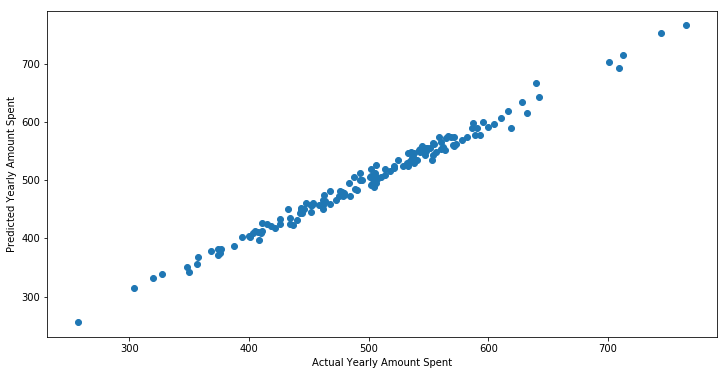

In [144]:
predictions = lm.predict(X_test)
fig = plt.figure(figsize = (12,6))
plot= plt.scatter(y_test,predictions)
axes = plot.axes
axes.set_xlabel('Actual Yearly Amount Spent')
axes.set_ylabel('Predicted Yearly Amount Spent')

## Evaluating the Model

Evaluating model's performance by calculating the model's residual sum of squares by using: 


-Mean Absolute Error, Mean Squared Error, Root Mean Squared Error

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = metrics.mean_squared_error(y_test, predictions)
print('MAE:  {}' .format(MAE))
print('MSE:  {}' .format(MSE))
print('RMSE:  {}' .format(RMSE))

## Calculating Residuals through Seaborns distplot

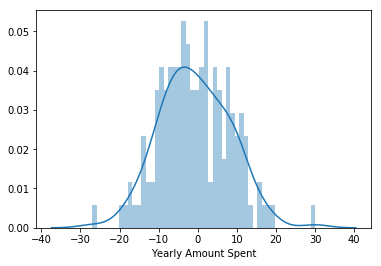

In [147]:
sns.distplot(y_test - predictions, bins = 50)

Since the residual plot is normally distributed, we can conclude that the linear model is a very good predictor

## Conclusion

In [120]:
coeff = pd.DataFrame(data = lm.coef_, index = X.columns, columns = ['Coeffecient'])
coeff

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Interpreting the Coefficients

Should the company focus more on their mobile app or on their website?

The company should in fact focus more on their mobile as the coefficient interpretation states that, holding all other features fixed, a one unit increase of the **Time on App** leads to a yearly amount spent increase of about $38.60.